In [1]:
print("Hello")

Hello


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
schema_df = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

In [7]:
schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [9]:
# Cleaning and preprocessing the data

In [10]:
selected_columns = ['Country','Age','Gender','EdLevel','UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck','Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt']

In [11]:
len(selected_columns)

20

In [12]:
survey_df = df[selected_columns].copy()

In [13]:
survey_df.shape

(64461, 20)

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
survey_df.YearsCode.unique()


# YearCode should be Numeric data but given as object data

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [16]:

# So replacing any string in the column with empty cell


survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,57473.000000,57473.000000,41151.000000
mean,30.834111,15.476572,15.476572,15.476572,40.782174
std,9.585392,5.114081,5.114081,5.114081,17.816383
min,1.000000,5.000000,5.000000,5.000000,1.000000
25%,24.000000,12.000000,12.000000,12.000000,40.000000
50%,29.000000,15.000000,15.000000,15.000000,40.000000
75%,35.000000,18.000000,18.000000,18.000000,44.000000
max,279.000000,85.000000,85.000000,85.000000,475.000000


In [18]:
# THe max age comes out to be 279 and min 1 but thats not possible 
# So dropping specific columns

In [19]:
survey_df.drop(survey_df[survey_df['Age']<10].index,inplace = True)

In [20]:
survey_df.drop(survey_df[survey_df['Age']>100].index,inplace = True)

In [21]:
survey_df.drop(survey_df[survey_df['WorkWeekHrs']>140].index, inplace=True)

In [22]:
survey_df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [23]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [24]:
# Multiple choices will be replaced with empty values

In [25]:
survey_df.where(-(survey_df.Gender.str.contains(";",na=False)),np.nan,inplace=True)

In [26]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [27]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,13.0,13.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,19.0,19.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,15.0,15.0,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,18.0,18.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,16.0,16.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [28]:
# EDA

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [30]:
# Country

In [31]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [32]:
# There are 183 countries but we want only first 15 countries with maximum responses

In [33]:
top_countries = survey_df['Country'].value_counts().head(15)

In [34]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<Axes: ylabel='Country'>

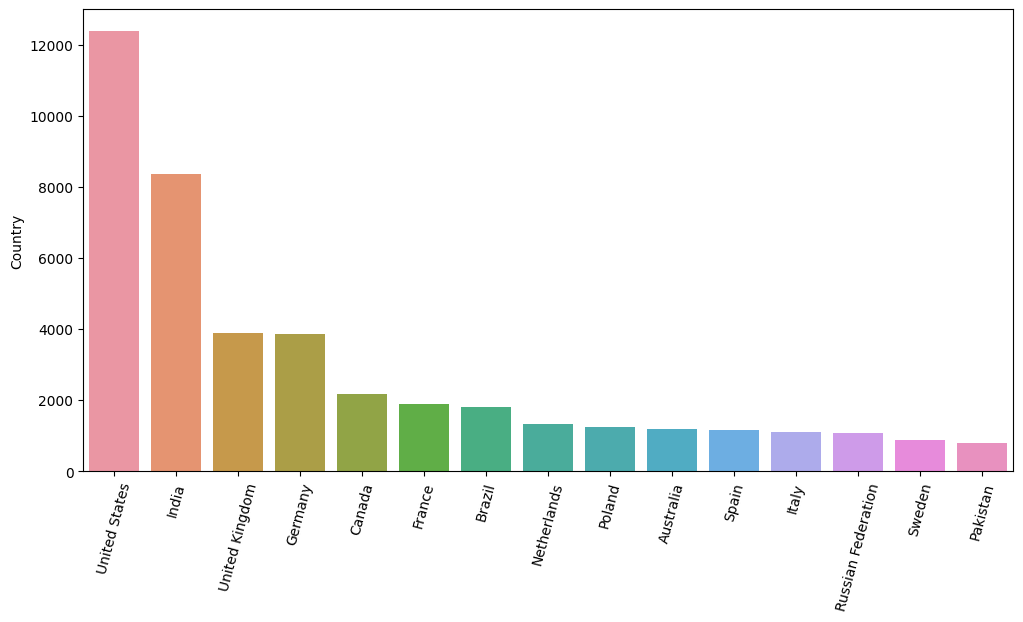

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x = top_countries.index,y = top_countries)

In [36]:
# Age

(array([2.0900e+02, 2.4190e+03, 9.1350e+03, 1.1938e+04, 8.7390e+03,
        5.5820e+03, 3.0310e+03, 1.7560e+03, 1.0380e+03, 6.2200e+02,
        3.3300e+02, 1.4300e+02, 7.1000e+01, 2.4000e+01, 9.0000e+00,
        6.0000e+00, 3.0000e+00]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75., 80., 85., 90., 95.]),
 <BarContainer object of 17 artists>)

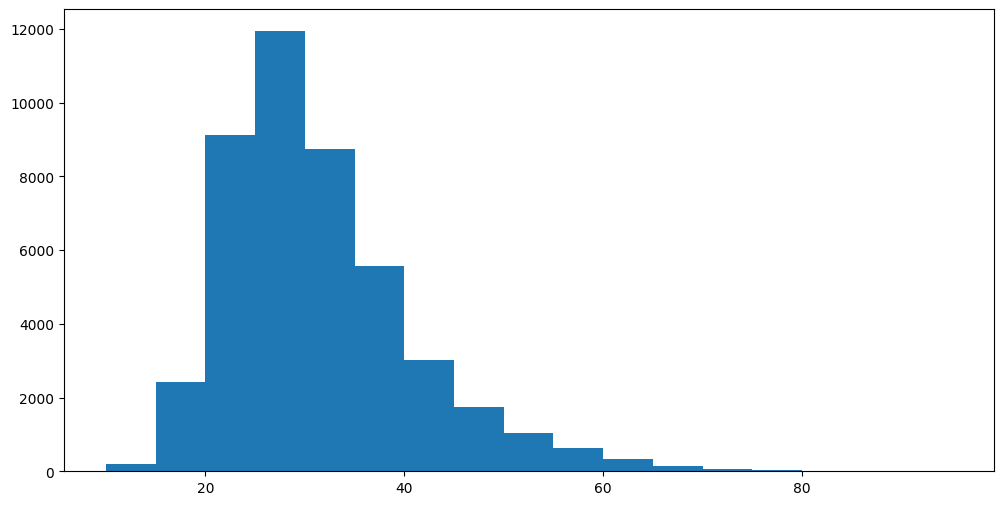

In [37]:
plt.figure(figsize=(12,6))
plt.hist(survey_df.Age, bins=np.arange(10,100,5))

In [38]:
# Gender

In [39]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [40]:
gender_count = survey_df.Gender.value_counts()

In [41]:
gender_count

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x17f3c69c1f0>,
 [Text(-1.0617335815722198, 0.28761398047005066, 'Man'),
  Text(1.054483540358784, -0.31315245985367046, 'Woman'),
  Text(1.0996796455244597, -0.026545757084685182, 'Non-binary, genderqueer, or gender non-conforming')])

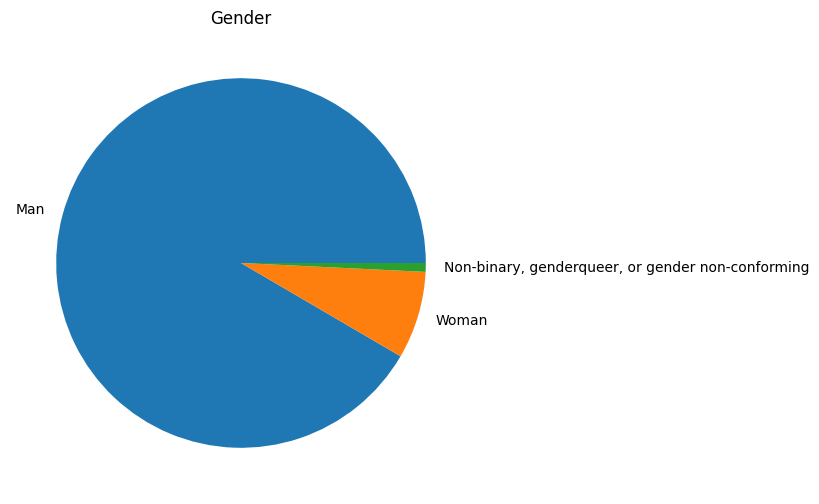

In [42]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_count,labels=gender_count.index,)

In [43]:
# Education LEvel

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000')])

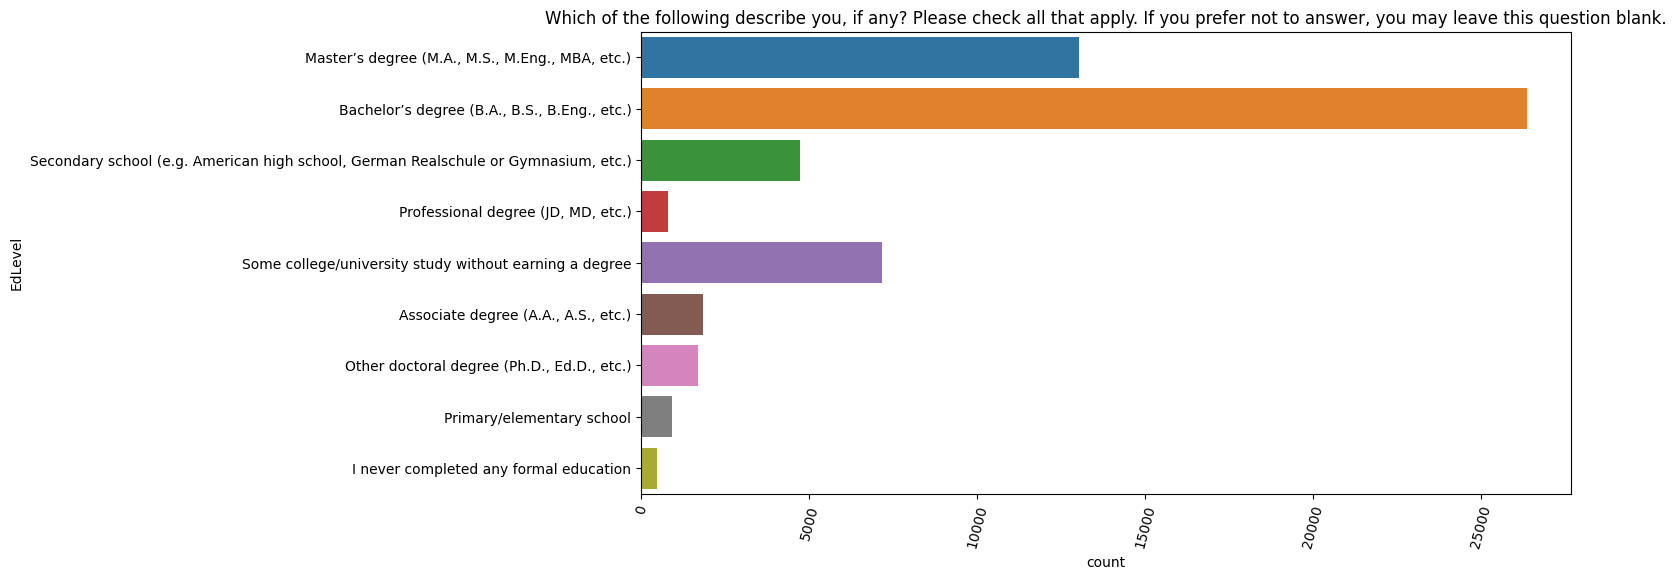

In [44]:
plt.figure(figsize=(12,6))

sns.countplot(y=survey_df.EdLevel)
plt.title(schema_df['Gender'])
plt.xticks(rotation=75)

([<matplotlib.patches.Wedge at 0x17f3c9f6740>,
 [Text(0.1291533505449734, 1.0923916019647018, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(-0.9743201160374403, -0.5105882014743282, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(0.027379539042804667, -1.099659202135736, 'Some college/university study without earning a degree'),
  Text(0.6919044137245637, -0.8551422584976538, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(0.9495760341047333, -0.5552525150361107, 'Associate degree (A.A., A.S., etc.)'),
  Text(1.038673802843516, -0.36215567272457416, 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
  Text(1.0798728268797906, -0.20946283146813857, 'Primary/elementary school'),
  Text(1.0948663353348975, -0.10614945949147374, 'Professional degree (JD, MD, etc.)'),
  Text(1.099614825553281, -0.02910730876305008, 'I never completed any formal education')])

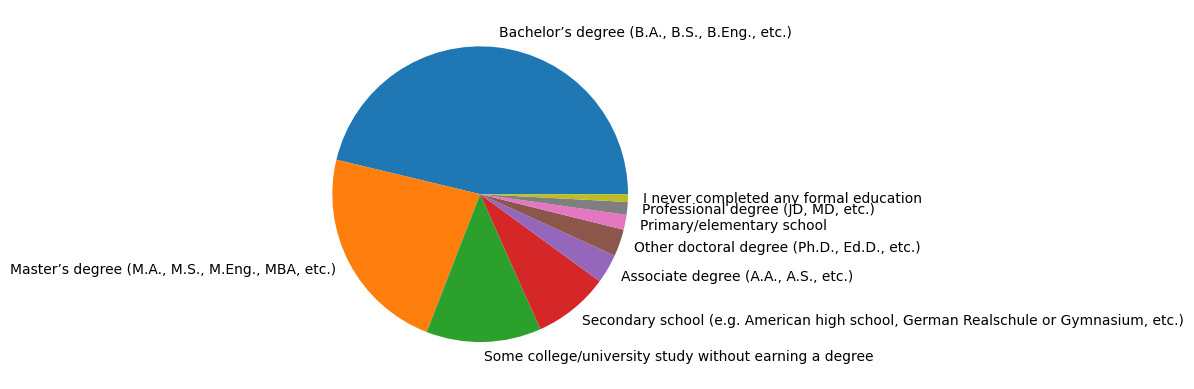

In [45]:
plt.pie(survey_df.EdLevel.value_counts(),labels=survey_df.EdLevel.value_counts().index)

In [46]:
# Employment

In [47]:
schema_df.Employment

'Which of the following best describes your current employment status?'

In [51]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [52]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

([<matplotlib.patches.Wedge at 0x17f4c0a2a70>,
 [Text(-0.6719668791186393, 0.8708963849778895, 'Employed full-time'),
  Text(0.1391231922405238, -1.091166686341187, 'Student'),
  Text(0.7802611639041404, -0.7753660529730176, 'Independent contractor, freelancer, or self-employed'),
  Text(1.0179747871824654, -0.4168061091932491, 'Not employed, but looking for work'),
  Text(1.0851631752661959, -0.1800579991174715, 'Employed part-time'),
  Text(1.099135644472644, -0.043598567060238284, 'Not employed, and not looking for work'),
  Text(1.0999215477034587, -0.013137309375523284, 'Retired')])

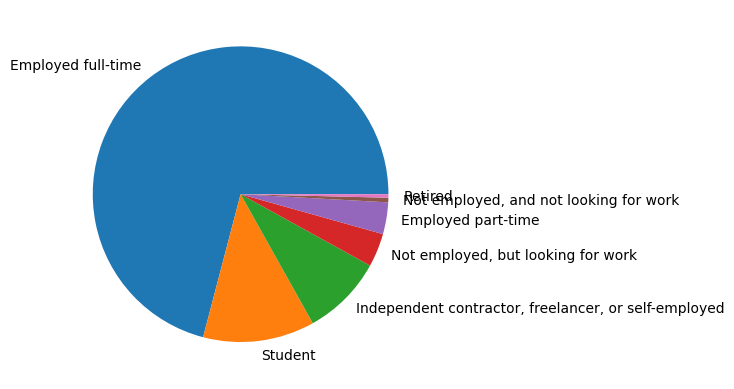

In [69]:
plt.pie(survey_df.Employment.value_counts(),labels = survey_df.Employment.value_counts().index)     